In [1]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

from scipy.io import loadmat

%matplotlib inline

In [2]:
data = loadmat(os.path.join('Data', 'ex5data1.mat'))

X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

m = y.size

In [3]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    m = y.size

    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================

    theta_1 = theta.copy()
    theta_1[0] = 0
    
    expected_values = X@theta
    J = (np.sum(np.square(expected_values - y)) + lambda_*np.sum(np.square(theta_1)))/(2*m)

    grad = ((expected_values - y)@X + lambda_*theta_1)/m
    
    # ============================================================
    return J, grad

In [4]:
def featureNormalize(X):
    
    mean = np.mean(X, axis=0)
    X_norm = X - mean
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    
    return X_norm, mean, sigma

In [5]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    
    m = y.size

    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    
    initial_theta = np.zeros(X.shape[1])
    
    for i in range(1, m+1):
        
        costFunction = lambda t : linearRegCostFunction(X[:i, :], y[:i], t, lambda_)
        
        theta = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC').x
        
        
        ############## IMPORTANT NOTE #################
        
        # while calculation any type of error lambda_ is always zero #
        
        
        error_train[i - 1], _ = linearRegCostFunction(X[:i, :], y[:i], theta, 0)
        
        error_val[i - 1], _ = linearRegCostFunction(Xval, yval, theta, 0)
        
    # =============================================================
    return error_train, error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


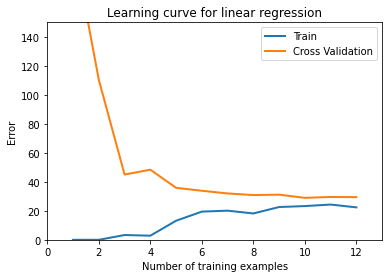

In [6]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [7]:
def polyFeatures(X, p):
    
    X_poly = np.zeros((X.shape[0], p))

    # ====================== YOUR CODE HERE ======================

    for i in range(X.shape[0]):
        X_poly[i, :] = [X[i]**_ for _ in range(1, p+1)]

    # ============================================================
    return X_poly

In [8]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)


Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846778
  	2		0.045772	143.522872
  	3		2.911375	5.534711
  	4		1.499412	6.609883
  	5		1.199184	6.634064
  	6		0.924511	8.291988
  	7		1.540898	5.737173
  	8		1.422966	5.516472
  	9		1.553734	6.239735
  	10		1.441573	5.983030
  	11		1.308138	6.043717
  	12		2.076201	4.260600


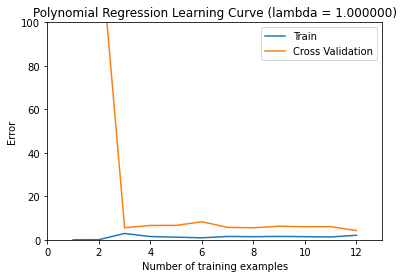

In [9]:
lambda_ = 1

costFunction = lambda t: linearRegCostFunction(X_poly, y, t, lambda_)
initial_theta = np.zeros(X_poly.shape[1])

theta = optimize.minimize(costFunction, initial_theta, jac=True).x

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100])
pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [10]:
def validationCurve(X, y, Xval, yval):
    
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    # ====================== YOUR CODE HERE ======================
    
    initial_theta = np.zeros((X.shape[1]))
    
    for i, lambda_ in enumerate(lambda_vec):
        
        costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)
        
        theta = optimize.minimize(costFunction, initial_theta, jac=True).x
        
        
        error_train[i], _ = linearRegCostFunction(X, y, theta, 0)
        error_val[i], _ = linearRegCostFunction(Xval, yval, theta, 0)

    # ============================================================
    return lambda_vec, error_train, error_val

lambda		Train Error	Validation Error
 0.000000	0.028891	54.159838
 0.001000	0.112692	9.836200
 0.003000	0.170962	16.296046
 0.010000	0.221493	16.948494
 0.030000	0.281849	12.827735
 0.100000	0.459320	7.586831
 0.300000	0.921762	4.636833
 1.000000	2.076188	4.260635
 3.000000	4.901352	3.822907
 10.000000	16.092207	9.945503


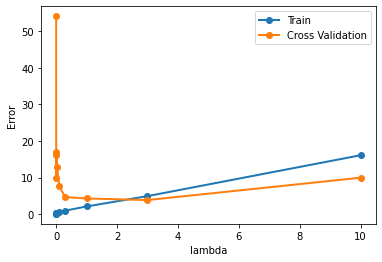

In [11]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))